# NIRCam saturation plot

JWST pocket guide

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import ticker
from matplotlib.ticker import MultipleLocator
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [2]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize']   = 18
mpl.rcParams['xtick.labelsize']  = 18
mpl.rcParams['ytick.labelsize']  = 18
mpl.rcParams['xtick.top']  = True
mpl.rcParams['ytick.right']  = True
mpl.rcParams['xtick.direction']  = 'in'
mpl.rcParams['ytick.direction']  = 'in'
mpl.rcParams['xtick.major.size']  = 8
mpl.rcParams['ytick.major.size']  = 8
mpl.rcParams['xtick.minor.size']  = 4
mpl.rcParams['ytick.minor.size']  = 4
mpl.rcParams['figure.autolayout']  = True
#mpl.rcParams['legend.fontsize']  = 14
#mpl.rcParams['legend.numpoints']  = 1
#mpl.rcParams['image.origin']  = 'lower'

In [3]:
import astropy.io.ascii
#import astropy.units as u
import numpy as np
import os

In [4]:
def between(lo, x, hi):
    return (lo < x) & (x < hi)

In [5]:
filter_table = astropy.io.ascii.read('NIRCam_filters.txt', format='commented_header', header_start=-1)
all_filters = list(filter_table['filter'])
all_filters = [filt.lower() for filt in all_filters]
filter_table[:2]

filter,center,bandwidth,response,lambda1,lambda2
str6,float64,float64,float64,float64,float64
F070W,0.704,0.128,0.237,0.624,0.781
F090W,0.901,0.194,0.318,0.795,1.005


In [6]:
#saturation_table = astropy.io.ascii.read('v1/saturationWL160.txt', format='commented_header', header_start=-1)
#saturation_table[:2]

In [7]:
WLP8_TS_filters = 'F150W F200W F140M F182M F210M F187N F212N'.split()  # Time Series Imaging
WLP8_GTS_filters = 'F070W F140M F182M F210M F187N F212N'.split()  # Grism Time Series Imaging
WLP8_filters = set(WLP8_TS_filters) | set(WLP8_GTS_filters)

In [8]:
def plot_saturation_results(infile, text_color, ylab, label):
    global ss, cc
    #txt = loadfile(infile)
    infile = os.path.join(indir, infile)
    saturation_table = astropy.io.ascii.read(infile) #, format='commented_header', header_start=-1)
    labeled = False
    plot_label = None
    filters = list(saturation_table['filt'])
    for i, filter in enumerate(filters):
        saturation = saturation_table['mag'][i]
    
        if 'WL' in infile:
            if filter not in WLP8_filters:
                continue
    
        ifilt = all_filters.index(filter)
        center  = filter_table['center'][ifilt]
        lambda1 = filter_table['lambda1'][ifilt]
        lambda2 = filter_table['lambda2'][ifilt]

        if 'W' in filter.upper():
            sym = 'D'
            lw = 1
            ms = 12
            fontweight = 'normal'
            fontsize = 10
            #color = 'k'
            style = 'normal'
        elif 'M' in filter.upper():
            sym = 'o'
            lw = 3
            color = 'k'
            ms = 8
            fontweight = 'bold'
            fontsize = 8
            #color = 'k'
            style = 'normal'
            #continue
        elif 'N' in filter.upper():
            sym = '+'
            lw = 5
            ms = 8
            fontweight = 'normal'
            fontsize = 10
            #color= 'k'
            style = 'italic'
            #continue
    
        #dy = 0.9
        #dy = 1.5
        saturation = float(saturation)
        #saturation -= 5  # WLP8 160x160
        y = saturation
        #yfac = 1.1
        #if filter in 'F212N F466N'.split():
        #    yfac = 0.84
        dy = 0.2
        #if filter in 'F115W F322W2 F470N F480M F200W F187N'.split(): # WL SUB160P
        if filter.upper() in 'F115W F466N F480M F200W'.split(): # FULL
            dy = -0.5
        if filter.upper() in 'F164N F187N F212N'.split():
            dy -= 0.8
        if 0: #filter.upper() in 'F182M '.split():
            #dy += 0.08
            if 'WL' not in infile:
                dy -= 0.5
            
        # Text Label
        plt.text(center, y-dy, filter.upper(), ha='center', fontsize=fontsize, fontweight=fontweight, color=text_color, style=style)
        #s = roundint(float(saturation))
        #text(center, float(saturation)-1, '%d'%s, ha='center', va='top', fontsize=10)

        # Horizontal bar
        if lw == 3:
            plot_label = label
            
        plt.plot([lambda1, lambda2], [saturation, saturation], text_color, lw=lw, zorder=-10, label=plot_label)
        if plot_label:
            plot_label = label = None
        
        #plot([center], [saturation], color+sym, ms=ms)
        ss.append(float(saturation))
        cc.append(float(center))

        #text(0.6, ylab, label, color=text_color)


In [9]:
def plot_grism_saturation_results(stype, label, text_color='r'):

    filt = 'f322w2'
    infile = 'grismsaturation_%s_%s.txt' % (filt, stype)
    infile = os.path.join(indir, infile)
    data = astropy.io.ascii.read(infile, format='basic', delimiter='\s', guess=False)
    #plot(data['lambda'], data['mag'])
    good = between(2.5, data['lambda'], 3.95)
    data1 = data[good]

    filt = 'f444w'
    infile = 'grismsaturation_%s_%s.txt' % (filt, stype)
    infile = os.path.join(indir, infile)
    data = astropy.io.ascii.read(infile, format='basic', delimiter='\s', guess=False)
    #plot(data['lambda'], data['mag'])
    good = between(3.95, data['lambda'], 4.9)
    data2 = data[good]

    lam = np.concatenate([data1['lambda'], data2['lambda']])
    sat = np.concatenate([data1['mag'],    data2['mag']])

    print(np.max(sat))

    zorder = 3 #- stypes.index(stype)
    if stype == 'm2v':
        lw = 1.5
    else:
        lw = 2
    
    plt.plot(lam, sat, label=label, zorder=zorder, lw=lw, color=text_color)



4.529999999999967


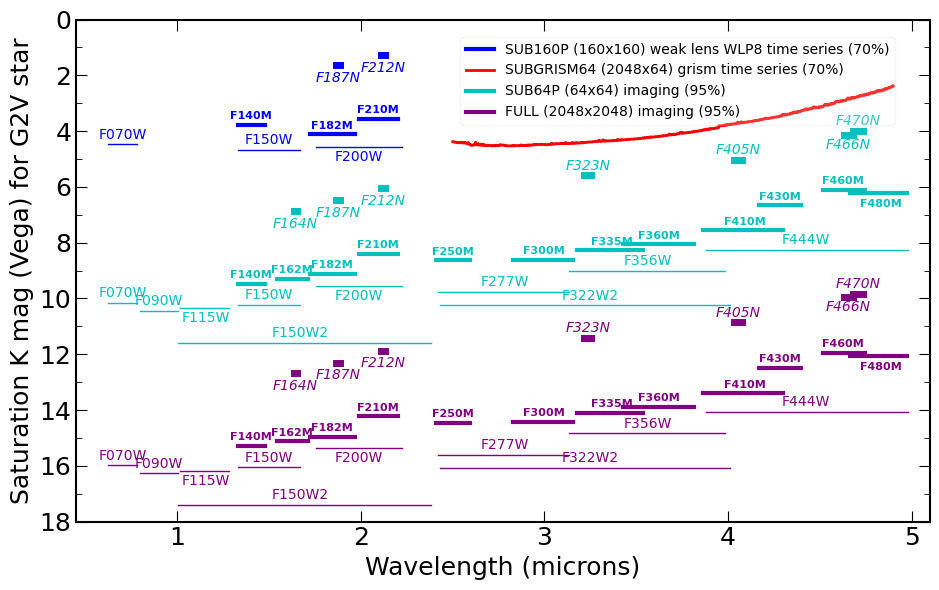

In [20]:
ss = []
cc = []

indir = ''  # input directory

fig, ax = plt.subplots(figsize=(9.5,6))

plot_saturation_results('nircam_saturation_sub160p_wlp8.txt', 'b',       1,     'SUB160P (160x160) weak lens WLP8 time series (70%)')  # 160x160 WLP8  Weak Lens
plot_grism_saturation_results('g2v', 'SUBGRISM64 (2048x64) grism time series (70%)')
plot_saturation_results('nircam_saturation_sub64p.txt',       'c',      12-5.8, 'SUB64P (64x64) imaging (95%)')   # 64x64
plot_saturation_results('nircam_saturation_full.txt',         'purple', 12,     'FULL (2048x2048) imaging (95%)') # 2048x2048


#ylo, yhi = 17.5, 0
ylo, yhi = 18, 0

plt.ylim(ylo, yhi)
#yticks(multiples(yhi, ylo))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))

#xlo, xhi = 0.5, 5.1
xlo, xhi = 0.45, 5.1
plt.xlim(xlo, xhi)

#xticks(multiples(xlo, xhi, 0.5))

plt.xlabel('Wavelength (microns)')
plt.ylabel('Saturation K mag (Vega) for G2V star')

leg = plt.legend(loc=(0.45,0.79), fontsize=10)
leg.get_frame().set_alpha(0.2)

outroot = 'NIRCam saturation all'
plt.savefig(outroot+'.png', dpi=150)
plt.savefig(outroot+'.pdf')